In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob 

In [ ]:
LAST_THREE_NIM_DIGITS = [0, 8, 8] 
IMAGE_DIR = 'handwritten_images'
IMG_SIZE = (28, 28)
INPUT_SHAPE_MNIST = (28, 28, 1)
INPUT_SHAPE_TL = (32, 32, 3)
NUM_CLASSES = 10
EPOCHS_A = 10
EPOCHS_B = 5
BATCH_SIZE = 32
unique_digits = list(set(LAST_THREE_NIM_DIGITS))

if not os.path.exists(IMAGE_DIR):
    print(f"Direktori '{IMAGE_DIR}' tidak ditemukan. Harap unggah folder ZIP atau mount Google Drive.")

In [19]:
print("1. Memuat dan Pra-Pemrosesan Dataset MNIST...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train_cat = to_categorical(y_train, NUM_CLASSES)
y_test_cat = to_categorical(y_test, NUM_CLASSES)

print(f"Shape data latih: {x_train.shape}")

1. Memuat dan Pra-Pemrosesan Dataset MNIST...
Shape data latih: (60000, 28, 28, 1)


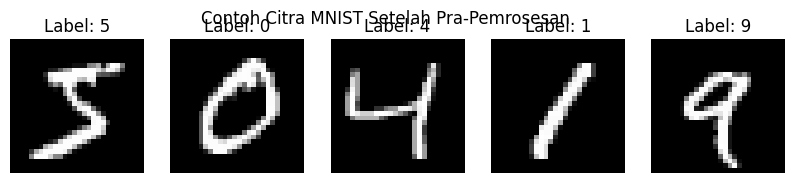

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Contoh Citra MNIST Setelah Pra-Pemrosesan")
plt.show()

In [ ]:
print("\n2. Membangun dan Melatih Model CNN dari Nol (Model A)...")

def build_model_A(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

model_A = build_model_A(INPUT_SHAPE_MNIST)
model_A.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


2. Membangun dan Melatih Model CNN dari Nol (Model A)...


In [ ]:
print("\nModel Summary (Gambar 1):")
model_A.summary()

history_A = model_A.fit(x_train, y_train_cat, epochs=EPOCHS_A, batch_size=BATCH_SIZE, validation_data=(x_test, y_test_cat))


Model Summary (Gambar 1):


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 34ms/step - accuracy: 0.8617 - loss: 0.4463 - val_accuracy: 0.9824 - val_loss: 0.0566
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9734 - loss: 0.0896 - val_accuracy: 0.9880 - val_loss: 0.0367
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9796 - loss: 0.0688 - val_accuracy: 0.9894 - val_loss: 0.0316
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9842 - loss: 0.0512 - val_accuracy: 0.9909 - val_loss: 0.0273
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9870 - loss: 0.0451 - val_accuracy: 0.9916 - val_loss: 0.0256
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9883 - loss: 0.0379 - val_accuracy: 0.9929 - val_loss: 0.0241
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9893 - loss: 0.0326 - val_accuracy: 0.9918 - val_loss: 0.0272
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9907 -

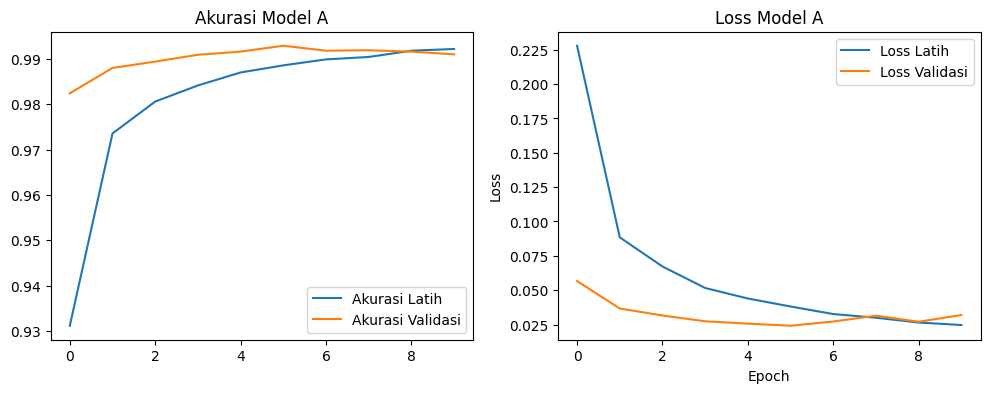

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_A.history['accuracy'], label='Akurasi Latih')
plt.plot(history_A.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model A')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_A.history['loss'], label='Loss Latih')
plt.plot(history_A.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model A')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


3. Evaluasi Model A dengan Tulisan Tangan Sendiri...
Ditemukan dan diproses 10 citra untuk angka 0.
Ditemukan dan diproses 20 citra untuk angka 8.

Visualisasi 5 Contoh Citra ASLI (Sebelum Pra-pemrosesan):


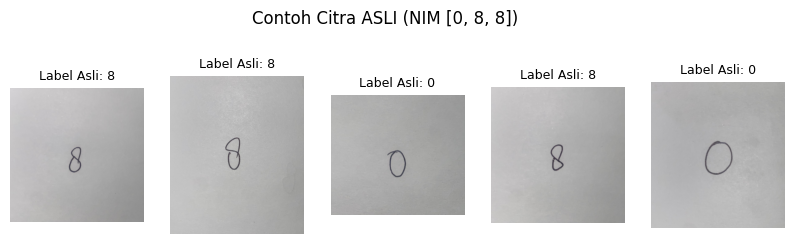

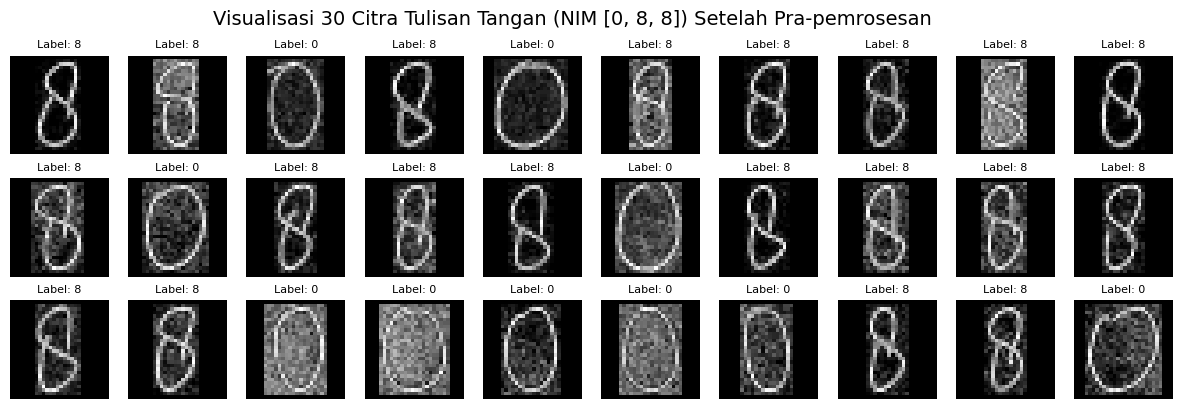

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

--- Hasil Prediksi Model A (CNN dari Nol) ---
Total Citra: 30
Prediksi Benar: 22
Akurasi Model A pada Tulisan Tangan Sendiri: 73.33%

Detail Prediksi:
Citra ke-1 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-2 (Angka Sebenarnya: 8): Prediksi model: 5 (Salah)
Citra ke-3 (Angka Sebenarnya: 0): Prediksi model: 0 (Benar)
Citra ke-4 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-5 (Angka Sebenarnya: 0): Prediksi model: 0 (Benar)
Citra ke-6 (Angka Sebenarnya: 8): Prediksi model: 5 (Salah)
Citra ke-7 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-8 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-9 (Angka Sebenarnya: 8): Prediksi model: 5 (Salah)
Citra ke-10 (Angka Sebenarnya: 8): Prediksi model: 5 (Salah)
Citra ke-11 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-12 (Angka Sebenarnya: 0): Prediksi model: 0 (Benar)
Citra ke-13 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-14 (Angka Sebena

In [ ]:
print("\n3. Evaluasi Model A dengan Tulisan Tangan Sendiri...")

def visualize_raw_images(filepaths, labels, nim_digits, cols=5):
    """Menampilkan 5 contoh citra asli dari file JPG/PNG sebelum preprocessing."""
    plt.figure(figsize=(10, 3))

    print("\nVisualisasi 5 Contoh Citra ASLI (Sebelum Pra-pemrosesan):")
    num_display = min(cols, len(filepaths))

    for i in range(num_display):
        file_path = filepaths[i]
        img = cv2.imread(file_path)

        plt.subplot(1, num_display, i + 1)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
        else:
             plt.text(0.5, 0.5, 'File Hilang', ha='center', va='center')

        plt.title(f"Label Asli: {labels[i]}", fontsize=9)
        plt.axis('off')

    plt.suptitle(f"Contoh Citra ASLI (NIM {nim_digits})", fontsize=12)
    plt.show()

def preprocess_handwritten_image(filepath, target_size=(28, 28)):
    img_gray = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        raise FileNotFoundError(f"Citra tidak ditemukan di: {filepath}")

    h, w = img_gray.shape
    crop_height = int(h * 0.05)
    img_to_process = img_gray[crop_height:, :]

    img_thresh = cv2.adaptiveThreshold(
        img_to_process,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        11,
        2
    )

    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        padding = 8
        x_crop = max(0, x - padding)
        y_crop = max(0, y - padding)

        img_cropped = img_thresh[y_crop : y + h + padding, x_crop : x + w + padding]
    else:
        img_cropped = img_thresh

    h_target, w_target = target_size
    img_canvas = np.zeros(target_size, dtype=np.uint8)

    h_c, w_c = img_cropped.shape
    scale_factor = min(w_target / w_c, h_target / h_c) * 0.95

    w_new = int(w_c * scale_factor)
    h_new = int(h_c * scale_factor)

    img_scaled = cv2.resize(img_cropped, (w_new, h_new), interpolation=cv2.INTER_AREA)

    x_offset = (w_target - w_new) // 2
    y_offset = (h_target - h_new) // 2

    img_canvas[y_offset:y_offset + h_new, x_offset:x_offset + w_new] = img_scaled

    return img_canvas.astype('float32') / 255.0

def load_and_preprocess_own_images(digit_list, img_dir):
    """Membaca SEMUA file JPG/PNG yang diawali dengan digit NIM."""
    images = []
    labels = []
    raw_filepaths = []

    all_files = glob.glob(os.path.join(img_dir, '*.jpg')) + glob.glob(os.path.join(img_dir, '*.png'))
    processed_count_by_digit = {d: 0 for d in digit_list}

    for filepath in all_files:
        filename = os.path.basename(filepath)
        try:
            digit_str = filename.split('_')[0]
            current_digit = int(digit_str)
        except (ValueError, IndexError):
            continue

        if current_digit in digit_list:
            try:
                processed_img = preprocess_handwritten_image(filepath)
                images.append(np.expand_dims(processed_img, axis=-1))
                labels.append(current_digit)
                raw_filepaths.append(filepath) # Simpan path asli untuk visualisasi mentah
                processed_count_by_digit[current_digit] += 1
            except Exception as e:
                pass

    for digit, count in processed_count_by_digit.items():
         print(f"Ditemukan dan diproses {count} citra untuk angka {digit}.")

    return np.array(images), np.array(labels), raw_filepaths

def visualize_all_processed_images(images, labels, cols=10, nim_digits=LAST_THREE_NIM_DIGITS):
    if images.shape[0] == 0:
        return

    rows = int(np.ceil(images.shape[0] / cols))
    plt.figure(figsize=(15, rows * 1.5))
    plt.tight_layout(pad=0.5)

    for i in range(images.shape[0]):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"Label: {labels[i]}", fontsize=8)
        plt.axis('off')
    plt.suptitle(f"Visualisasi {images.shape[0]} Citra Tulisan Tangan (NIM {nim_digits}) Setelah Pra-pemrosesan", fontsize=14)
    plt.show()


own_images_A, own_labels_A, raw_filepaths_A = load_and_preprocess_own_images(unique_digits, IMAGE_DIR)

visualize_raw_images(raw_filepaths_A[:5], own_labels_A[:5], LAST_THREE_NIM_DIGITS)

visualize_all_processed_images(own_images_A, own_labels_A, nim_digits=LAST_THREE_NIM_DIGITS)

if own_images_A.shape[0] > 0:
    predictions_A = model_A.predict(own_images_A)
    predicted_classes_A = np.argmax(predictions_A, axis=1)
    correct_predictions_A = (predicted_classes_A == own_labels_A).sum()
    accuracy_A = correct_predictions_A / own_images_A.shape[0]

    print(f"\n--- Hasil Prediksi Model A (CNN dari Nol) ---")
    print(f"Total Citra: {own_images_A.shape[0]}")
    print(f"Prediksi Benar: {correct_predictions_A}")
    print(f"Akurasi Model A pada Tulisan Tangan Sendiri: {accuracy_A * 100:.2f}%")

    print("\nDetail Prediksi:")
    for i in range(own_images_A.shape[0]):
        status = "Benar" if predicted_classes_A[i] == own_labels_A[i] else "Salah"
        print(f"Citra ke-{i+1} (Angka Sebenarnya: {own_labels_A[i]}): Prediksi model: {predicted_classes_A[i]} ({status})")
else:
    accuracy_A = 0.0
    print("Tidak ada citra tulisan tangan yang berhasil dimuat untuk evaluasi Model A.")

In [ ]:
print("\n4. Implementasi Transfer Learning (Model B)...")

x_train_tl = np.repeat(x_train, 3, axis=-1)
x_test_tl = np.repeat(x_test, 3, axis=-1)

def resize_data(data, target_size=(32, 32)):
    resized_data = []
    for img in data:
        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)
        resized_data.append(resized_img)
    return np.array(resized_data)

x_train_tl_resized = resize_data(x_train_tl, target_size=(32, 32))
x_test_tl_resized = resize_data(x_test_tl, target_size=(32, 32))

print(f"Shape data latih untuk TL: {x_train_tl_resized.shape}")

base_model = VGG16(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE_TL)

for layer in base_model.layers:
    layer.trainable = False


4. Implementasi Transfer Learning (Model B)...
Shape data latih untuk TL: (60000, 32, 32, 3)


In [ ]:
model_B = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model_B.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_B = model_B.fit(x_train_tl_resized, y_train_cat, epochs=EPOCHS_B, batch_size=BATCH_SIZE, validation_data=(x_test_tl_resized, y_test_cat))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 988s 526ms/step - accuracy: 0.7831 - loss: 0.6826 - val_accuracy: 0.9448 - val_loss: 0.1758
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 989s 527ms/step - accuracy: 0.9328 - loss: 0.2121 - val_accuracy: 0.9605 - val_loss: 0.1226
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 970s 517ms/step - accuracy: 0.9454 - loss: 0.1693 - val_accuracy: 0.9619 - val_loss: 0.1160
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 988s 521ms/step - accuracy: 0.9518 - loss: 0.1513 - val_accuracy: 0.9666 - val_loss: 0.0976
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 972s 518ms/step - accuracy: 0.9560 - loss: 0.1366 - val_accuracy: 0.9663 - val_loss: 0.1032


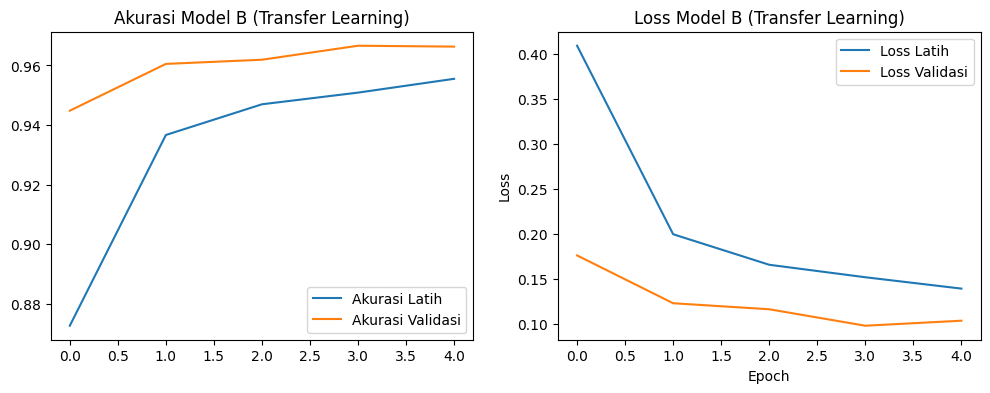

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_B.history['accuracy'], label='Akurasi Latih')
plt.plot(history_B.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model B (Transfer Learning)')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_B.history['loss'], label='Loss Latih')
plt.plot(history_B.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model B (Transfer Learning)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


5. Evaluasi Model B dengan Tulisan Tangan Sendiri...


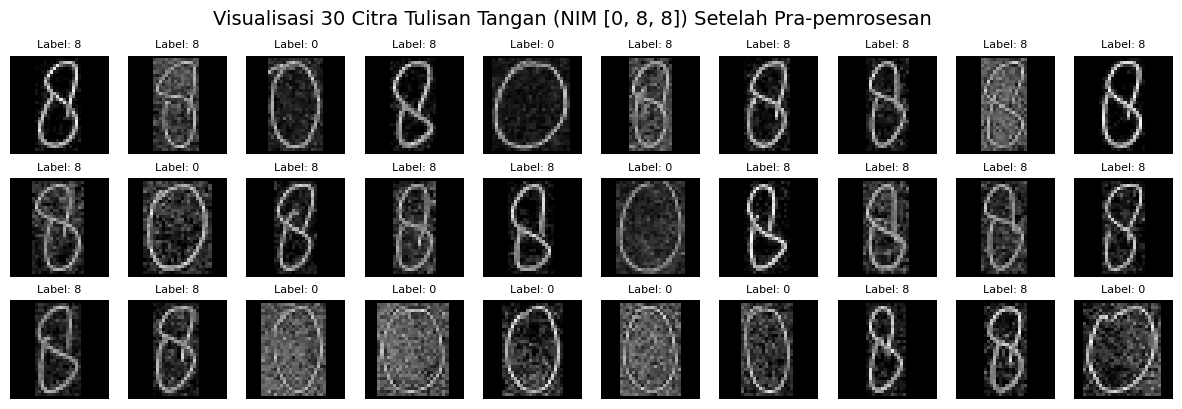

In [ ]:
print("\n5. Evaluasi Model B dengan Tulisan Tangan Sendiri...")

def preprocess_handwritten_image_tl(filepath, target_size=(32, 32)):
    img_gray = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        raise FileNotFoundError(f"Citra tidak ditemukan di: {filepath}")

    h, w = img_gray.shape
    crop_height = int(h * 0.05)
    img_to_process = img_gray[crop_height:, :]

    img_thresh = cv2.adaptiveThreshold(
        img_to_process,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        11,
        2
    )

    contours, _ = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        padding = 8
        x_crop = max(0, x - padding)
        y_crop = max(0, y - padding)

        img_cropped = img_thresh[y_crop : y + h + padding, x_crop : x + w + padding]
    else:
        img_cropped = img_thresh

    h_target, w_target = target_size
    img_canvas = np.zeros(target_size, dtype=np.uint8)

    h_c, w_c = img_cropped.shape
    scale_factor = min(w_target / w_c, h_target / h_c) * 0.95

    w_new = int(w_c * scale_factor)
    h_new = int(h_c * scale_factor)

    img_scaled = cv2.resize(img_cropped, (w_new, h_new), interpolation=cv2.INTER_AREA)

    x_offset = (w_target - w_new) // 2
    y_offset = (h_target - h_new) // 2

    img_canvas[y_offset:y_offset + h_new, x_offset:x_offset + w_new] = img_scaled

    img_3ch = np.repeat(np.expand_dims(img_canvas, axis=-1), 3, axis=-1)
    return img_3ch.astype('float32') / 255.0

def load_and_preprocess_own_images_tl(digit_list, img_dir):
    """Membaca SEMUA file JPG yang diawali dengan digit NIM untuk Model B."""
    images = []
    labels = []
    all_files = glob.glob(os.path.join(img_dir, '*.jpg')) + glob.glob(os.path.join(img_dir, '*.png'))

    for filepath in all_files:
        filename = os.path.basename(filepath)
        try:
            digit_str = filename.split('_')[0]
            current_digit = int(digit_str)
        except (ValueError, IndexError):
            continue

        if current_digit in digit_list:
            try:
                processed_img = preprocess_handwritten_image_tl(filepath)
                images.append(processed_img)
                labels.append(current_digit)
            except Exception as e:
                pass

    return np.array(images), np.array(labels)

own_images_B, own_labels_B = load_and_preprocess_own_images_tl(unique_digits, IMAGE_DIR)

visualize_all_processed_images(own_images_B, own_labels_B, cols=10, nim_digits=LAST_THREE_NIM_DIGITS)

In [ ]:
if own_images_B.shape[0] > 0:
    predictions_B = model_B.predict(own_images_B)
    predicted_classes_B = np.argmax(predictions_B, axis=1)

    correct_predictions_B = (predicted_classes_B == own_labels_B).sum()
    accuracy_B = correct_predictions_B / own_images_B.shape[0]

    print(f"\n--- Hasil Prediksi Model B (Transfer Learning) ---")
    print(f"Total Citra: {own_images_B.shape[0]}")
    print(f"Prediksi Benar: {correct_predictions_B}")
    print(f"Akurasi Model B pada Tulisan Tangan Sendiri: {accuracy_B * 100:.2f}%")

    print("\nDetail Prediksi:")
    for i in range(own_images_B.shape[0]):
        status = "Benar" if predicted_classes_B[i] == own_labels_B[i] else "Salah"
        print(f"Citra ke-{i+1} (Angka Sebenarnya: {own_labels_B[i]}): Prediksi model: {predicted_classes_B[i]} ({status})")
else:
    accuracy_B = 0.0
    print("Tidak ada citra tulisan tangan yang berhasil dimuat untuk evaluasi Model B.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step

--- Hasil Prediksi Model B (Transfer Learning) ---
Total Citra: 30
Prediksi Benar: 21
Akurasi Model B pada Tulisan Tangan Sendiri: 70.00%

Detail Prediksi:
Citra ke-1 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-2 (Angka Sebenarnya: 8): Prediksi model: 4 (Salah)
Citra ke-3 (Angka Sebenarnya: 0): Prediksi model: 0 (Benar)
Citra ke-4 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-5 (Angka Sebenarnya: 0): Prediksi model: 0 (Benar)
Citra ke-6 (Angka Sebenarnya: 8): Prediksi model: 4 (Salah)
Citra ke-7 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-8 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-9 (Angka Sebenarnya: 8): Prediksi model: 1 (Salah)
Citra ke-10 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-11 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-12 (Angka Sebenarnya: 0): Prediksi model: 0 (Benar)
Citra ke-13 (Angka Sebenarnya: 8): Prediksi model: 8 (Benar)
Citra ke-14 (Angka S

In [ ]:
print("\n6. Analisis Perbandingan & Kesimpulan")
print("--- Kinerja Akurasi pada Tulisan Tangan Sendiri ---")

try:
    final_accuracy_A = accuracy_A
except NameError:
    final_accuracy_A = 0.0

try:
    final_accuracy_B = accuracy_B
except NameError:
    final_accuracy_B = 0.0

print(f"Model A (CNN dari Nol): {final_accuracy_A * 100:.2f}%")
print(f"Model B (Transfer Learning): {final_accuracy_B * 100:.2f}%")